# Final Assignment, Coursera IBM Data Science Capstone

## This notebook will be used to create and share all requirements from the last course

### 1) First assignment : Import librairies

In [12]:
!pip install numpy --upgrade
!pip install pandas
import pandas as pd
import numpy as np

     |████████████████████████████████| 9.9 MB 15.0 MB/s eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibm-watson-machine-learning 1.0.45 requires pandas<=1.0.5, but you have pandas 1.2.2 which is incompatible.


In [13]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


### 2) Second assignment : Let's go Toronto

#### a)  Part 1 - Scrapping Wikipedia

##### Import BS and requests, define Next Step to automatically stop in case of error

In [14]:
from bs4 import BeautifulSoup
import requests
next_step = True

In [15]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html_data = requests.get(url)

##### Use BeautifulSoup to parse url

In [16]:
soup = BeautifulSoup(html_data.text, 'html.parser')

##### The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

In [17]:
toronto_neighborhoods_source = pd.DataFrame(columns=["PostalCode", "Borough", "Neighbourhood"])

##### Get table from url. Wikipedia uses the class "wikitable sortable" to store the data we need

In [18]:
table = soup.find("table", { "class" : "wikitable sortable" }).find_all("tr")

##### Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [19]:
for row in table:
    col = row.find_all("td")
    if len(col) > 0:
        cells = row.find_all("td")
        PostalCode = cells[0].get_text(strip=True) #strip = True removes "\n" at the end of each text value
        Borough = cells[1].get_text(strip=True)
        Neighbourhood = cells[2].get_text(strip=True)
        if(Borough != "Not assigned"): #we remove "Not assigned" boroughs
            toronto_neighborhoods_source = toronto_neighborhoods_source.append({"PostalCode":PostalCode, "Borough":Borough, "Neighbourhood":Neighbourhood}, ignore_index=True)


##### Check dataframe head

In [20]:
toronto_neighborhoods_source.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


##### More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.

In [21]:
if (sum(toronto_neighborhoods_source.groupby(['PostalCode']).count()["Borough"]) == toronto_neighborhoods_source["PostalCode"].count()) & next_step:
    print("Already combined, go next step")
else:
    print("Something to do")
    next_step = False
#Seems to be done in Wikipedia table, count of rows grouped by PostalCode = count of rows without groups

Already combined, go next step


##### If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.

In [22]:
if (toronto_neighborhoods_source[toronto_neighborhoods_source["Neighbourhood"] == "Not assigned"].count()["PostalCode"]) == 0 & next_step:
    print("No not assigned neighborhood")
else:
    print("Something to do")
    next_step = False
#No "Not assigned" neighborhood with "Assigned" borough

No not assigned neighborhood


##### In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [23]:
print(toronto_neighborhoods_source.shape)

(103, 3)


#### b) Part 2 - We now need to get the latitude and the longitude coordinates of each neighborhood

##### Import geocoder

In [24]:
!pip install geocoder
import geocoder # import geocoder
import json

##### Start to retrieve the coordinates using geocoder with Bing api

In [25]:
# initialize your variable to None
location = None
lat_long_df = pd.DataFrame(columns = ["PostalCode","Latitude", "Longitude"])
lim = 0

nbPostalCode = toronto_neighborhoods_source.shape[0]

for i in range(nbPostalCode):
    # loop until you get the coordinates of each postal code in the dataframe
    PostalCode = toronto_neighborhoods_source.iloc[i]["PostalCode"]
    address = ('{}, Toronto, Ontario'.format(PostalCode))
    
    location = geocoder.bing(address, key="AleEpOyasZ0iz0IAQvg1-IlnUBkCFWNNZxogPQ7azEB3Ztt8MOzf3P7X2Unxbcm8")
    result = json.dumps(location.json)
    data = json.loads(result)

    if(data["status"] == "OK"):
        Latitude = data["lat"]
        Longitude = data["lng"]
        print(address, " OK")
        lat_long_df = lat_long_df.append({"PostalCode":PostalCode, "Latitude":Latitude, "Longitude":Longitude}, ignore_index=True)
    else:
        Latitude = 0
        Longitude = 0
        print(address, " KO")


M3A, Toronto, Ontario  OK
M4A, Toronto, Ontario  OK
M5A, Toronto, Ontario  OK
M6A, Toronto, Ontario  OK
M7A, Toronto, Ontario  OK
M9A, Toronto, Ontario  OK
M1B, Toronto, Ontario  OK
M3B, Toronto, Ontario  OK
M4B, Toronto, Ontario  OK
M5B, Toronto, Ontario  OK
M6B, Toronto, Ontario  OK
M9B, Toronto, Ontario  OK
M1C, Toronto, Ontario  OK
M3C, Toronto, Ontario  OK
M4C, Toronto, Ontario  OK
M5C, Toronto, Ontario  OK
M6C, Toronto, Ontario  OK
M9C, Toronto, Ontario  OK
M1E, Toronto, Ontario  OK
M4E, Toronto, Ontario  OK
M5E, Toronto, Ontario  OK
M6E, Toronto, Ontario  OK
M1G, Toronto, Ontario  OK
M4G, Toronto, Ontario  OK
M5G, Toronto, Ontario  OK
M6G, Toronto, Ontario  OK
M1H, Toronto, Ontario  OK
M2H, Toronto, Ontario  OK
M3H, Toronto, Ontario  OK
M4H, Toronto, Ontario  OK
M5H, Toronto, Ontario  OK
M6H, Toronto, Ontario  OK
M1J, Toronto, Ontario  OK
M2J, Toronto, Ontario  OK
M3J, Toronto, Ontario  OK
M4J, Toronto, Ontario  OK
M5J, Toronto, Ontario  OK
M6J, Toronto, Ontario  OK
M1K, Toronto

##### Check data in json with coordinates

In [26]:
print(lat_long_df)

    PostalCode   Latitude  Longitude
0          M3A  43.756123 -79.329636
1          M4A  43.726780 -79.310738
2          M5A  43.655354 -79.365044
3          M6A  43.721996 -79.445915
4          M7A  43.663910 -79.388733
..         ...        ...        ...
98         M8X  43.652699 -79.511276
99         M4Y  43.666286 -79.382446
100        M7Y  43.651894 -79.381714
101        M8Y  43.633709 -79.496521
102        M8Z  43.629711 -79.517479

[103 rows x 3 columns]


##### Check coordinates dataframe size vs wikipedia dataframe size

In [27]:
if(lat_long_df.shape[0] == toronto_neighborhoods_source.shape[0]) & next_step:
    print("Merge is possible, data can be slightely differents because of Bing geocoder")
else:
    print("Need to import csv")
    lat_long_df = pd.read_csv("https://cocl.us/Geospatial_data")

Merge is possible, data can be slightely differents because of Bing geocoder


##### Finally, merge coordinates with wikipedia data

In [28]:
toronto_with_lat_long = pd.merge(toronto_neighborhoods_source, lat_long_df, on=['PostalCode'])
toronto_with_lat_long.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.756123,-79.329636
1,M4A,North York,Victoria Village,43.726780,-79.310738
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.655354,-79.365044
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.721996,-79.445915
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.663910,-79.388733


#### c) Part 3 - Explore and cluster the neighborhoods in Toronto

##### Import depedencies

In [29]:
!pip install folium --upgrade
import folium

##### Let's start by the map of neighbourhood

In [30]:
# create map of Toronto using latitude and longitude values
address = ('Toronto, Ontario')
location = geocoder.bing(address, key="AleEpOyasZ0iz0IAQvg1-IlnUBkCFWNNZxogPQ7azEB3Ztt8MOzf3P7X2Unxbcm8")
result = json.dumps(location.json)
data = json.loads(result)

if(data["status"] == "OK"):
    Latitude = data["lat"]
    Longitude = data["lng"]
    print(address, " OK")

map_toronto = folium.Map(location=[Latitude, Longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighbourhood in zip(toronto_with_lat_long['Latitude'], toronto_with_lat_long['Longitude'], toronto_with_lat_long['Borough'], toronto_with_lat_long['Neighbourhood']):
    html = "<b>" + borough + "</b>" + "<br>" + "<i>" + neighbourhood.replace(",", "\n") + "</i>"
    iframe = folium.IFrame(html=html, width=200, height=100)
    popup = folium.Popup(iframe, max_width=2650)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=popup,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Toronto, Ontario  OK


##### Next, we need to retrieve Foursquare venues in each borough (200 max per borough)

In [31]:
toronto_venues = pd.DataFrame(columns = ["PostalCode", "Venue", "VenueCategory"])

ACCESS_TOKEN = 'CXLOL41WLZQXOQVTXHRLMNIIMQW11IW1MFM0ALPAGV3PZDGK'
RADIUS = 500
LIMIT = 200
VERSION = '20180605'

for postal, latitude, longitude in zip(toronto_with_lat_long["PostalCode"], toronto_with_lat_long["Latitude"], toronto_with_lat_long["Longitude"]):
    url = 'https://api.foursquare.com/v2/venues/explore?oauth_token={}&ll={},{}&v={}&radius={}&limit={}'.format(ACCESS_TOKEN, latitude, longitude, VERSION, RADIUS, LIMIT)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    for res in results:
        venue = res['venue']['name']
        category = res['venue']['categories'][0]['name']
        toronto_venues = toronto_venues.append({"PostalCode":postal, "Venue":venue, "VenueCategory":category}, ignore_index=True)

##### Let's count venues by neighbourhood

In [32]:
toronto_venues.groupby('PostalCode').count()['Venue']

PostalCode
M1B     4
M1C     1
M1E    46
M1G     5
M1H     4
       ..
M9N     7
M9P    10
M9R     6
M9V    32
M9W     3
Name: Venue, Length: 101, dtype: int64

##### Find out how many unique categories

In [33]:
print('There are {} uniques categories.'.format(len(toronto_venues['VenueCategory'].unique())))

There are 317 uniques categories.


##### One hot encoding (transforms categories to dummy)

In [34]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['PostalCode'] = toronto_venues['PostalCode'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()
#toronto_onehot[toronto_onehot['PostalCode'] == 'Marble Hill']

,PostalCode,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Size of this onehot dataframe

In [35]:
toronto_onehot.shape

(3609, 318)

##### Group by neighbourhood and mean of frequency

In [36]:
toronto_grouped = toronto_onehot.groupby('PostalCode').mean().reset_index()
toronto_grouped

,PostalCode,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M1B,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M1C,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M1E,0.021739,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.021739,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M1G,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M1H,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,M9N,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,M9P,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,M9R,0.000000,0.00000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,M9V,0.000000,0.03125,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Check the shape

In [37]:
toronto_grouped.shape

(101, 318)

##### Function to return most common venues

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Now let's create the new dataframe and display the top 10 venues for each neighborhood

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['PostalCode'] = toronto_grouped['PostalCode']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Construction & Landscaping,Home Service,Fast Food Restaurant,Hobby Shop,Music School,Nightlife Spot,Nightclub,New American Restaurant,Neighborhood,Music Venue
1,M1C,Park,ATM,North Indian Restaurant,Nightlife Spot,Nightclub,New American Restaurant,Neighborhood,Music Venue,Music Store,Music School
2,M1E,Pizza Place,Electronics Store,Restaurant,Bank,Grocery Store,Pharmacy,Coffee Shop,Fast Food Restaurant,Medical Center,Filipino Restaurant
3,M1G,Coffee Shop,Park,Insurance Office,Business Service,ATM,Nightlife Spot,Nightclub,New American Restaurant,Neighborhood,Music Venue
4,M1H,Construction & Landscaping,Trail,Gaming Cafe,Museum,Nightlife Spot,Nightclub,New American Restaurant,Neighborhood,Music Venue,Music Store


##### Cluster neighbourhood

In [41]:
toronto_grouped_clustering = toronto_grouped.drop('PostalCode', 1)

toronto_grouped_clustering

,ATM,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Service,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.021739,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.021739,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.000000,0.00000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.000000,0.03125,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.03125,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Import KMeans

In [43]:
!pip install sklearn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

##### Find best cluster number

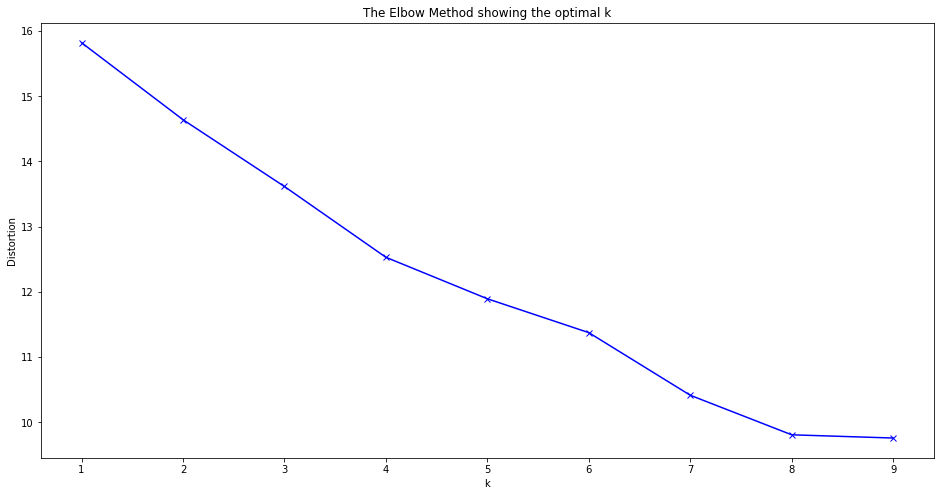

In [47]:
# run k-means clustering
distortions = []
K = range(1,10)
kclusters = 5
for kclusters in K:
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### The best K seems to be 8 ?

In [67]:
kclusters = 8
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

kmeans.labels_

array([5, 4, 0, 0, 5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 7, 5, 0,
       0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 5, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

##### Let's merge all those data

In [61]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_final = pd.merge(neighborhoods_venues_sorted, lat_long_df, on=['PostalCode'])
toronto_final = pd.merge(toronto_final, toronto_neighborhoods_source, on=['PostalCode'])
toronto_final.head()

,Cluster Labels,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude,Borough,Neighbourhood
0,5,M1B,Construction & Landscaping,Home Service,Fast Food Restaurant,Hobby Shop,Music School,Nightlife Spot,Nightclub,New American Restaurant,Neighborhood,Music Venue,43.806847,-79.201469,Scarborough,"Malvern, Rouge"
1,4,M1C,Park,ATM,North Indian Restaurant,Nightlife Spot,Nightclub,New American Restaurant,Neighborhood,Music Venue,Music Store,Music School,43.787216,-79.152519,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,0,M1E,Pizza Place,Electronics Store,Restaurant,Bank,Grocery Store,Pharmacy,Coffee Shop,Fast Food Restaurant,Medical Center,Filipino Restaurant,43.767628,-79.189026,Scarborough,"Guildwood, Morningside, West Hill"
3,0,M1G,Coffee Shop,Park,Insurance Office,Business Service,ATM,Nightlife Spot,Nightclub,New American Restaurant,Neighborhood,Music Venue,43.769047,-79.218201,Scarborough,Woburn
4,5,M1H,Construction & Landscaping,Trail,Gaming Cafe,Museum,Nightlife Spot,Nightclub,New American Restaurant,Neighborhood,Music Venue,Music Store,43.768265,-79.237984,Scarborough,Cedarbrae


##### Import matplotlib colors and modules

In [63]:
import matplotlib.cm as cm
import matplotlib.colors as colors

##### And finally, create the map

In [65]:
# create map
# create map of Toronto using latitude and longitude values
address = ('Toronto, Ontario')
location = geocoder.bing(address, key="AleEpOyasZ0iz0IAQvg1-IlnUBkCFWNNZxogPQ7azEB3Ztt8MOzf3P7X2Unxbcm8")
result = json.dumps(location.json)
data = json.loads(result)

if(data["status"] == "OK"):
    Latitude = data["lat"]
    Longitude = data["lng"]
    print(address, " OK")
    
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, borough, cluster in zip(toronto_final['Latitude'], toronto_final['Longitude'], toronto_final['Neighbourhood'], toronto_final['Borough'], toronto_final['Cluster Labels']):
    #label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    html = "<b>" + borough + "</b>" + "<br>" + "<i>" + neighbourhood.replace(",", "\n") + "</i>" + "</br>" + "Cluster : " + str(cluster)
    iframe = folium.IFrame(html=html, width=200, height=100)
    popup = folium.Popup(iframe, max_width=2650)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=popup,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Toronto, Ontario  OK
